Hierarchical KMeans gồm 2 thuật toán là agglomerative clustering and divisive clustering:
- Agglomerative clustering: Đây là cách tiếp cận bottom-up. Tức là coi mỗi sample như là một cluster sau đó tiến hành bắt cặp các cụm và gom lại cứ thế tuần tự
- Divisive clustering: Đây là cách tiếp cận top-down. Ban đầu coi tất cả samples đều chung 1 cluster. Sau đó split chúng theo từng tự.

In [24]:
print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

import numpy as np            
import pandas as pd 

X, y = datasets.load_digits(return_X_y=True)

Automatically created module for IPython interactive environment


In [25]:
X.shape

(1797, 64)

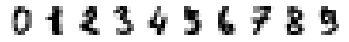

In [2]:
#in thử 10 ảnh ra
images_and_labels = list(zip(X, y))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
#Hàm dùng để plot
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
average :	0.07s
complete :	0.05s
single :	0.02s


<Figure size 1000x800 with 0 Axes>

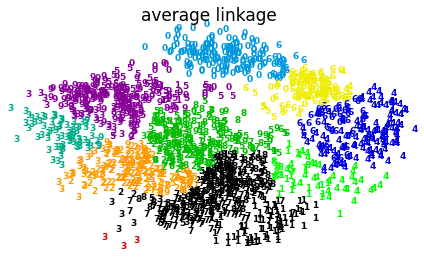

<Figure size 1000x800 with 0 Axes>

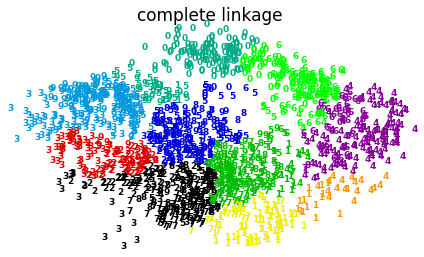

<Figure size 1000x800 with 0 Axes>

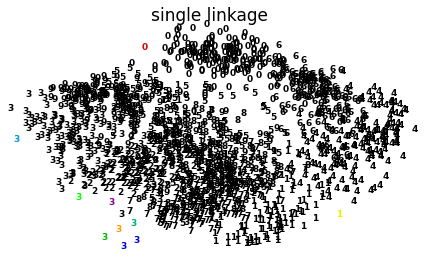

In [31]:
#agglomerative clustering 
print("Computing embedding")
# X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X) #convert vector có 64 componets về vector có 2 components

X_red = PCA(n_components=2).fit_transform(data)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('average', 'complete', 'single'):
    figure(figsize=(10, 8), dpi=100)
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10) #Chọn 10 cụm vì thức chất data ở đây có 10
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [17]:
# import the datset
dataset = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-06/bt1.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
X = dataset.iloc[:,[3,4]].values

In [23]:
# import scipy.cluster.hierarchy as sch
# # make a dendogram used ward method 
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
# plt.title('Dendogram using %s linkage' %method)
# plt.xlabel('customers')
# plt.ylabel('Euclidean distance')
# plt.show()
# #Từ đây hãy chọn só cụm thích hơp và phân cụm bằng thuật toán agglomerative clustering

Text(0.5, 1.0, 'Data without clustering')

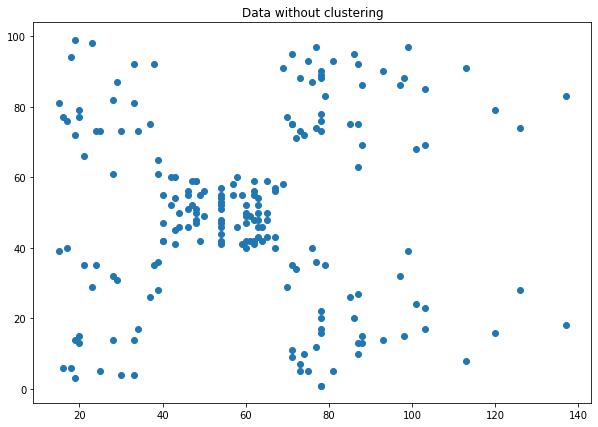

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.title('Data without clustering')

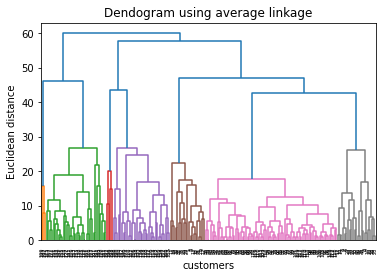

In [9]:
import scipy.cluster.hierarchy as sch
# make a dendogram used ward method 
method = 'average'
dendrogram = sch.dendrogram(sch.linkage(X, method ))
plt.title('Dendogram using %s linkage' %method)
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()

#Từ đây hãy chọn só cụm thích hơp và phân cụm bằng thuật toán agglomerative clustering

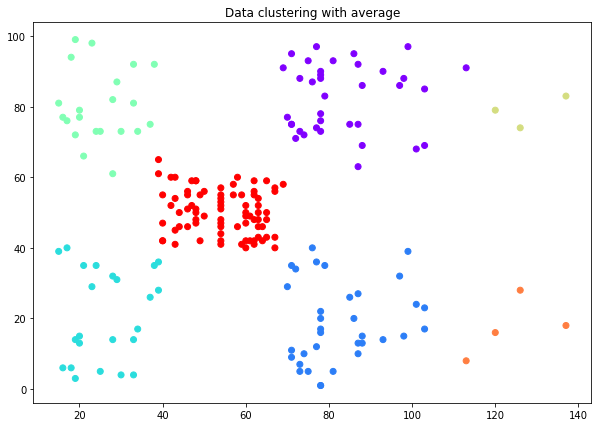

In [10]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
cluster.fit_predict(X)
plt.figure(figsize=(10, 7))
plt.title('Data clustering with average')
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

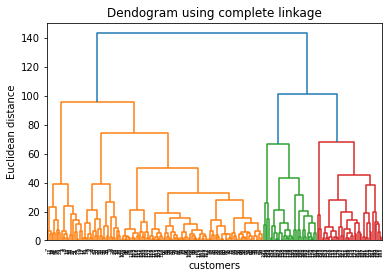

In [11]:
import scipy.cluster.hierarchy as sch
# make a dendogram used ward method 
method = 'complete'
dendrogram = sch.dendrogram(sch.linkage(X, method ))
plt.title('Dendogram using %s linkage' %method)
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()

#Từ đây hãy chọn só cụm thích hơp và phân cụm bằng thuật toán agglomerative clustering

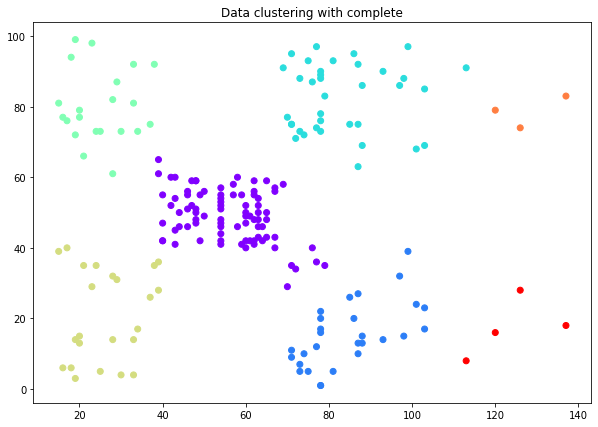

In [12]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)
plt.figure(figsize=(10, 7))
plt.title('Data clustering with complete')
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

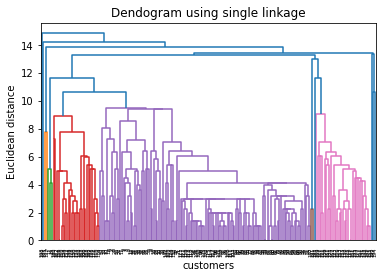

In [13]:
import scipy.cluster.hierarchy as sch
# make a dendogram used ward method 
method = 'single'
dendrogram = sch.dendrogram(sch.linkage(X, method))
plt.title('Dendogram using %s linkage' %method)
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()

#Từ đây hãy chọn só cụm thích hơp và phân cụm bằng thuật toán agglomerative clustering

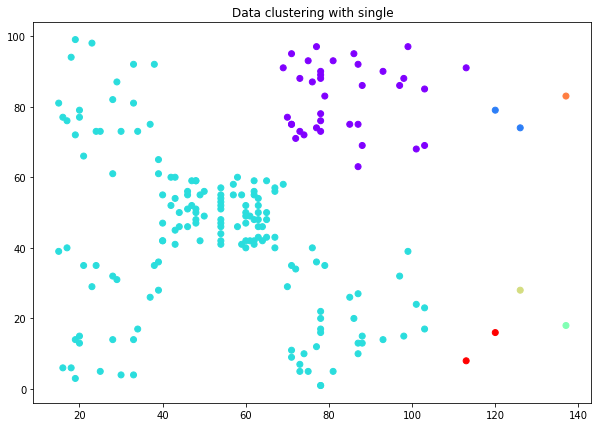

In [14]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single')
cluster.fit_predict(X)
plt.figure(figsize=(10, 7))
plt.title('Data clustering with single')
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

In [10]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [11]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.084s	69662	0.680	0.719	0.699	0.570	0.695	0.181
random   	0.045s	69707	0.675	0.716	0.694	0.560	0.691	0.166
PCA-based	0.019s	72713	0.637	0.659	0.648	0.521	0.644	0.142
__________________________________________________________________________________


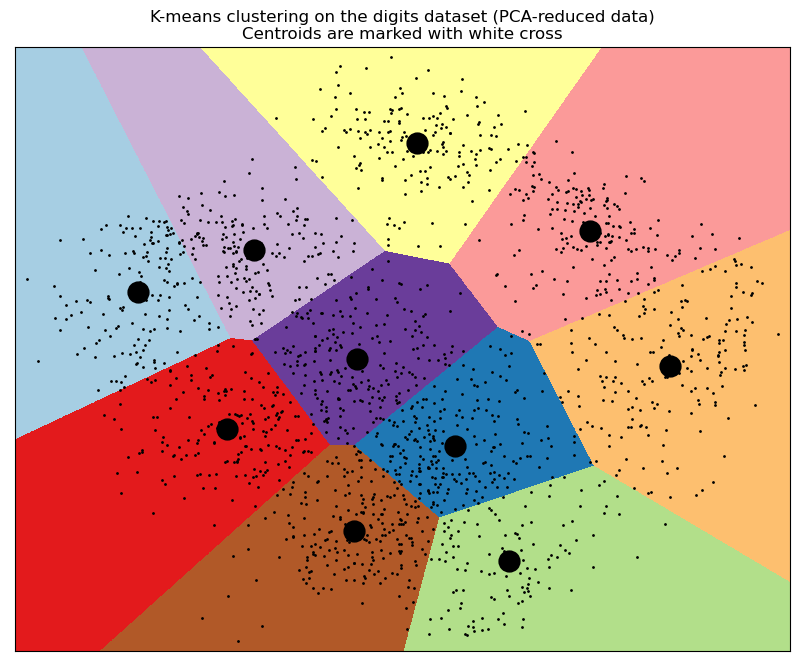

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# print("Computing embedding")
# reduced_data = manifold.SpectralEmbedding(n_components=2).fit_transform(data)

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
figure(figsize=(10, 8), dpi=100)

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="o",
    s=169,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
for linkage in ('average', 'complete', 'single'):
    figure(figsize=(10, 8), dpi=100)
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10) #Chọn 10 cụm vì thức chất data ở đây có 10
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [38]:
X_red

array([[ -1.25946696,  21.27488227],
       [  7.95759159, -20.76869265],
       [  6.99193349,  -9.95599037],
       ...,
       [ 10.80129545,  -6.96025505],
       [ -4.87210768,  12.4239537 ],
       [ -0.34436473,   6.36554352]])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])